In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('placement.csv')

In [3]:
dataset

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


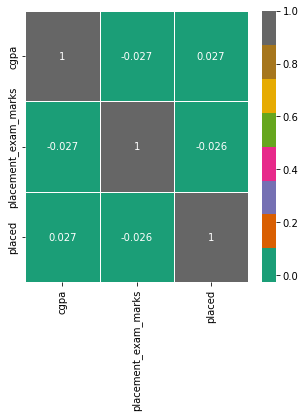

In [4]:
# Correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dataset.corr(), cmap = "Dark2", annot = True, linewidths=.5, ax=ax)
plt.show()

In [6]:
X = dataset.iloc[ : ,  0 ].values
Y = dataset.iloc[ : , 1 ].values

In [7]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

<AxesSubplot:>

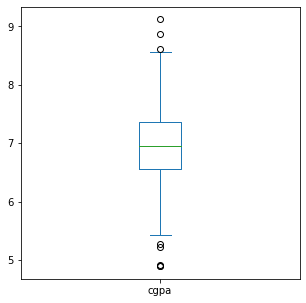

In [8]:
plt.figure(figsize=(5,5))
dataset.cgpa.plot(kind='box')

<AxesSubplot:>

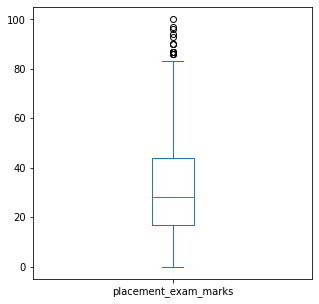

In [9]:
plt.figure(figsize=(5,5))
dataset.placement_exam_marks.plot(kind='box')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

In [16]:
Y_pred = regressor.predict(X_test)
Y_pred_train = regressor.predict(X_train)
Y_pred_train

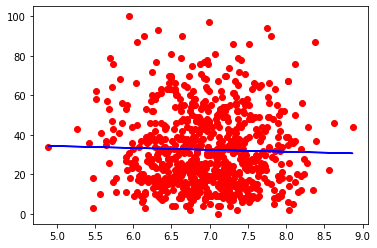

In [17]:
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')

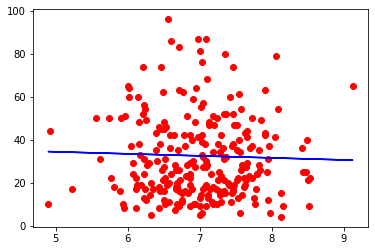

In [18]:
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , regressor.predict(X_test), color ='blue')

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn import metrics
df = pd.DataFrame(['Column','Test', 'Train'])
final_arr = []
mse_value = ["MSE: ",metrics.mean_squared_error(Y_test,Y_pred),metrics.mean_squared_error(Y_train,Y_pred_train)]
rmse_values = ["RMSE", sqrt(mean_squared_error(Y_test,Y_pred)), sqrt(mean_squared_error(Y_train,Y_pred_train))]
r2_values = ["R2",r2_score(Y_test,Y_pred),r2_score(Y_train, Y_pred_train)]
mae_values = ["MAE",metrics.mean_absolute_error(Y_test,Y_pred), metrics.mean_absolute_error(Y_train,Y_pred_train) ]

final_arr.append(mse_value)
final_arr.append(rmse_values)
final_arr.append(r2_values)
final_arr.append(mae_values)

df = pd.DataFrame(final_arr, columns = ['Column','Test', 'Train'])
df

,Column,Test,Train
0,MSE:,361.662044,366.655099
1,RMSE,19.017414,19.148240
2,R2,-0.002251,0.000870
3,MAE,15.590044,15.493258
